In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import PyPDF2
import spacy
from wordcloud import WordCloud
from gensim.models import Word2Vec
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

nlp = spacy.load('de_core_news_sm')
stop_words = nlp.Defaults.stop_words

In [2]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [163]:
path=''

In [6]:
# a function to read a pdf file, it return either text or list
def wahl_program(path, as_text = True):
    l = []
    file = open(path, 'rb')
    fileReader = PyPDF2.PdfFileReader(file) 
    
    for i in range(fileReader.getNumPages()):
        l.append(fileReader.getPage(i).extractText())
        
    if as_text == True:
        return " ".join(l)
    else:
        return l
    


In [7]:
# cleaning text data from punctions and stop worlds and similar words 
def clean_text(doc):    
    text_tokens = nlp(doc)
    tokens_without_punc = [token.text for token in text_tokens if token.text.isalpha()]
    tokens_without_sw = [t for t in tokens_without_punc if t.lower() not in stop_words]
    doc = nlp(" ".join(tokens_without_sw ))
    text_cleaned=[i.lemma_ for i in doc]
    return " ".join(text_cleaned)

In [8]:
# dividing text into sentences
def get_sent(x):
    l = []
    for i in x.split('.'):
        if i != '':
            l.append(i)
    return l

In [110]:
# a function for common words visualization, word embedding, vectorization, and topic modelling 
def result (path, word_cloud = True):
    text = wahl_program(path)
    clean_t = clean_text(text)
    
    if word_cloud:
        wordcloud = WordCloud(background_color="white", max_words=1000)
        wordcloud.generate(clean_t)

        plt.figure(figsize=(13,13))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
    
    tdf = TfidfVectorizer(max_df=0.85, stop_words= stop_words)
    X = pd.Series((wahl_program(path, as_text=False))).apply(clean_text)
    v = tdf.fit_transform(X)
   
    nmf = NMF(n_components=3, random_state = 42)
    nmf.fit(v)
    
    
    X = pd.Series(get_sent(text)).apply(clean_text)
    td = TfidfVectorizer()
    v = td.fit_transform(X)
    
    a=pd.DataFrame(v.toarray(), columns=td.get_feature_names())
    common = a.sum().sort_values(ascending=False).head(20).to_frame('score')
    
    model_vec= Word2Vec(X.apply(lambda x: x.split()).array, size = 1000)

    model_vec.train(X.apply(lambda x: x.split()).array, total_examples=len(X.apply(lambda x: x.split()).array), epochs=4000)
    
    for index,topic in enumerate(nmf.components_):
        print(f'THE TOP 15 WORDS FOR TOPIC #{index}')
        print([tdf.get_feature_names()[i] for i in topic.argsort()[-15:]])
        print('\n')
    
    return model_vec, common

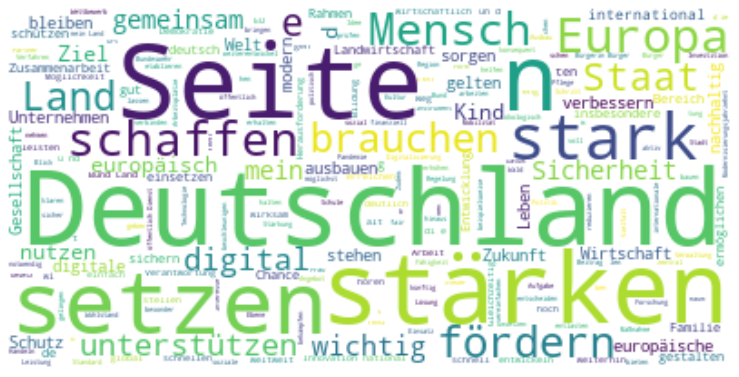

THE TOP 15 WORDS FOR TOPIC #0
['digitale', 'fördern', 'sicherheit', 'bund', 'unternehmen', 'setzen', 'bürger', 'stark', 'mensch', 'stärken', 'digital', 'staat', 'deutschland', 'schaffen', 'land']


THE TOP 15 WORDS FOR TOPIC #1
['stark', 'setzen', 'eng', 'partner', 'demokratie', 'welt', 'sicherheit', 'deutschland', 'global', 'eu', 'union', 'gemeinsam', 'europäisch', 'europäische', 'europa']


THE TOP 15 WORDS FOR TOPIC #2
['mensch', 'aufstieg', 'sozial', 'jugendliche', 'fördern', 'beruf', 'mann', 'euro', 'gewalt', 'eltern', 'schule', 'frau', 'bildung', 'familie', 'kind']




In [111]:
cdu = result(f'{path}Regierungsprogramm.pdf')

In [112]:
cdu[0].most_similar('Deutschland')

[('schließen', 0.19958114624023438),
 ('profitieren', 0.18372651934623718),
 ('hmen', 0.18337363004684448),
 ('sicherheitspolitisch', 0.18143635988235474),
 ('Bundesregierung', 0.1799154132604599),
 ('Partner', 0.17443343997001648),
 ('insbesondere', 0.17060258984565735),
 ('etablieren', 0.1705351173877716),
 ('europäische', 0.16512827575206757),
 ('entstehen', 0.16219928860664368)]

In [113]:
cdu[0].wv.most_similar('Demokratie')

[('abstimmen', 0.30421942472457886),
 ('ordnen', 0.24220812320709229),
 ('Terror', 0.23816338181495667),
 ('EU', 0.23635078966617584),
 ('cherheit', 0.22563642263412476),
 ('Modernisierung', 0.2204580307006836),
 ('zudem', 0.2196841984987259),
 ('scher', 0.21472910046577454),
 ('modern', 0.2118871808052063),
 ('Grundlage', 0.2048928290605545)]

In [115]:
cdu[0].wv.most_similar('Europa')

[('Welt', 0.23488007485866547),
 ('ung', 0.19238583743572235),
 ('Wasserstoff', 0.19041675329208374),
 ('e', 0.1865558624267578),
 ('trotzen', 0.1818149834871292),
 ('strategisch', 0.179470956325531),
 ('Initiative', 0.17582917213439941),
 ('n', 0.17411838471889496),
 ('Zukunft', 0.17246687412261963),
 ('leben', 0.17123840749263763)]

In [150]:
cdu[0].wv.most_similar('Digitalisierung')

[('Gebäude', 0.2213890552520752),
 ('Startups', 0.21609923243522644),
 ('lich', 0.21219706535339355),
 ('Lebensqualität', 0.2074316442012787),
 ('Klimawandel', 0.17017541825771332),
 ('zugänglich', 0.1628265380859375),
 ('schaft', 0.16111677885055542),
 ('zielgerichtet', 0.16090744733810425),
 ('ökonomisch', 0.15858003497123718),
 ('Welt', 0.15646755695343018)]

In [151]:
cdu[0].wv.most_similar(positive=['Deutschland', 'Digitalisierung'], topn=3)

[('Aufbruch', 0.18812569975852966),
 ('Bundesregierung', 0.1878495216369629),
 ('schaft', 0.17312473058700562)]

In [152]:
cdu[0].wv.most_similar(positive=['Deutschland'], negative=['Digitalisierung'], topn=3)

[('Netzwerke', 0.19006092846393585),
 ('streben', 0.18800285458564758),
 ('profitieren', 0.18717896938323975)]

In [153]:
cdu[0].wv.most_similar(positive=['Deutschland','Wirtschaft'],negative=['Digitalisierung'], topn=3)

[('europäische', 0.21602006256580353),
 ('Netzwerke', 0.1985166072845459),
 ('ur', 0.19077442586421967)]

In [119]:
cdu[1]

,score
seite,40.768306
deutschland,35.752267
land,29.768665
stärken,29.246169
europa,27.920852
setzen,26.290841
stark,25.621036
schaffen,23.392472
mensch,22.551579
kind,20.109610


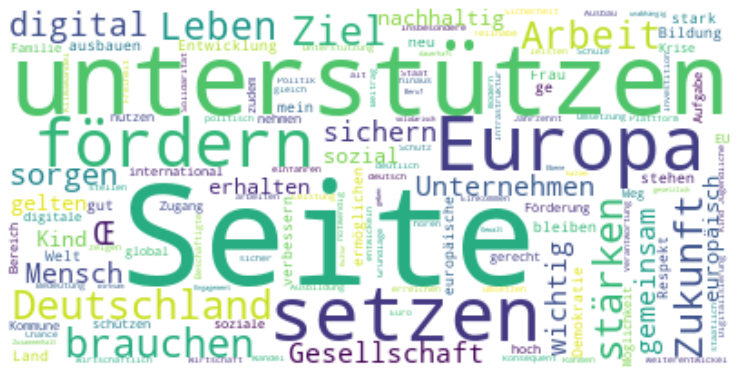

THE TOP 15 WORDS FOR TOPIC #0
['rente', 'ausbildung', 'behinderung', 'eltern', 'alt', 'frau', 'junge', 'respekt', 'leben', 'gesellschaft', 'familie', 'arbeit', 'jugendliche', 'mensch', 'kind']


THE TOP 15 WORDS FOR TOPIC #1
['russland', 'respekt', 'global', 'stärken', 'krise', 'setzen', 'gemeinsam', 'welt', 'leben', 'zukunft', 'demokratie', 'europäisch', 'eu', 'europäische', 'europa']


THE TOP 15 WORDS FOR TOPIC #2
['erhalten', 'sichern', 'nachhaltig', 'wichtig', 'energie', 'kommune', 'entwicklung', 'ziel', 'digitale', 'brauchen', 'sorgen', 'deutschland', 'fördern', 'unterstützen', 'digital']




In [120]:
sdp = result(f'{path}SPD-Zukunftsprogramm.pdf')

In [121]:
sdp[0].wv.most_similar('Deutschland')

[('grundlegend', 0.2649630308151245),
 ('neu', 0.25883084535598755),
 ('bekommen', 0.21719753742218018),
 ('solidarisch', 0.20811404287815094),
 ('hören', 0.20746579766273499),
 ('Politik', 0.1998850554227829),
 ('Beziehung', 0.18804535269737244),
 ('zielen', 0.18782196938991547),
 ('Schutz', 0.1814759373664856),
 ('deutschen', 0.1807428002357483)]

In [123]:
sdp[0].wv.most_similar('Demokratie')

[('nachhaltig', 0.31539639830589294),
 ('beispielsweise', 0.2929188311100006),
 ('auˆauen', 0.2716054320335388),
 ('Zusammenhalt', 0.2447369247674942),
 ('fahren', 0.23987945914268494),
 ('Bedeutung', 0.23456795513629913),
 ('leben', 0.22808298468589783),
 ('Politik', 0.22768674790859222),
 ('Kampf', 0.21560639142990112),
 ('gerecht', 0.21506856381893158)]

In [154]:
sdp[0].wv.most_similar('Digitalisierung')

[('erarbeiten', 0.23086316883563995),
 ('Rahmenbedingungen', 0.2213551253080368),
 ('Wert', 0.21877944469451904),
 ('modernisieren', 0.19883114099502563),
 ('Verein', 0.18116256594657898),
 ('bieten', 0.1784919798374176),
 ('Dienstleistungen', 0.1758742779493332),
 ('weltweit', 0.17190095782279968),
 ('verändern', 0.17162984609603882),
 ('Arbeitsplätze', 0.16952909529209137)]

In [155]:
sdp[0].wv.most_similar(positive=['Deutschland', 'Digitalisierung'], topn=3)

[('Wert', 0.22207847237586975),
 ('bestehen', 0.20513945817947388),
 ('grundlegend', 0.19928184151649475)]

In [156]:
sdp[0].wv.most_similar(positive=['Deutschland'], negative=['Digitalisierung'], topn=3)

[('Anerkennung', 0.22682200372219086),
 ('Eltern', 0.2251794934272766),
 ('schließen', 0.22353465855121613)]

In [157]:
sdp[0].wv.most_similar(positive=['Deutschland','Wirtschaft'],negative=['Digitalisierung'], topn=3)

[('hören', 0.24064229428768158),
 ('bleiben', 0.22350172698497772),
 ('sicher', 0.21103300154209137)]

In [131]:
sdp[1]

,score
seite,39.155234
europa,18.125476
unterstützen,15.657701
deutschland,15.164585
zukunft,15.153029
arbeit,14.148562
brauchen,13.964330
ziel,13.848053
setzen,13.729593
leben,13.608323


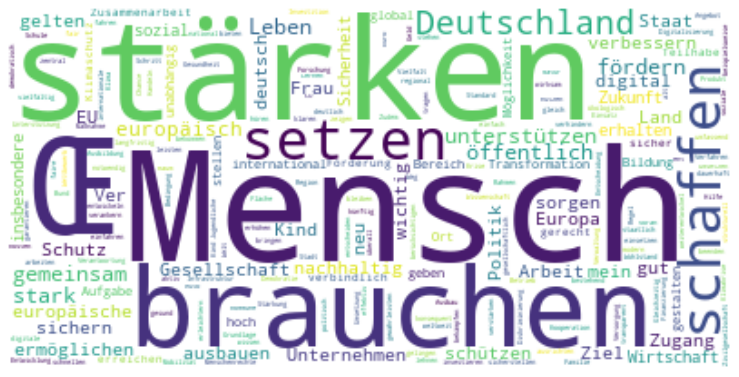

THE TOP 15 WORDS FOR TOPIC #0
['zusammenarbeit', 'deutschland', 'sicherheit', 'demokratie', 'menschenrechte', 'stärken', 'setzen', 'international', 'gemeinsam', 'europäische', 'staat', 'europa', 'global', 'eu', 'europäisch']


THE TOP 15 WORDS FOR TOPIC #1
['kitas', 'stärken', 'jugendhilfe', 'frau', 'leben', 'ausbildung', 'lernen', 'eltern', 'brauchen', 'familie', 'mensch', 'bildung', 'schule', 'jugendliche', 'kind']


THE TOP 15 WORDS FOR TOPIC #2
['ermöglichen', 'kommune', 'leben', 'unterstützen', 'ökologisch', 'brauchen', 'co', 'stärken', 'fördern', 'mensch', 'nachhaltig', 'land', 'unternehmen', 'schaffen', 'öffentlich']




In [132]:
grn = result(f'{path}Wahlprogramm-DIE-GRUENEN-Bundestagswahl-2021_barrierefrei.pdf')

In [133]:
grn[0].wv.most_similar('Deutschland')

[('erreichen', 0.18840840458869934),
 ('Partnerschaft', 0.1844877302646637),
 ('informieren', 0.18231940269470215),
 ('nachhaltig', 0.1739957332611084),
 ('verbinden', 0.17135557532310486),
 ('Sicherheitspolitik', 0.1709636151790619),
 ('attraktiv', 0.17080014944076538),
 ('Inter', 0.16693972051143646),
 ('teilhaben', 0.16339954733848572),
 ('KiTas', 0.16029420495033264)]

In [135]:
grn[0].wv.most_similar('Demokratie')

[('international', 0.21583198010921478),
 ('Prozeß', 0.20741891860961914),
 ('Basis', 0.201316237449646),
 ('Integration', 0.18573547899723053),
 ('Diskriminierung', 0.18449468910694122),
 ('zunehmend', 0.1784847378730774),
 ('Auswärtige', 0.16531899571418762),
 ('reformieren', 0.1642702966928482),
 ('EU', 0.16331049799919128),
 ('Institution', 0.16288800537586212)]

In [149]:
grn[0].wv.most_similar('Europa')

[('divers', 0.2341414988040924),
 ('Nation', 0.2177911102771759),
 ('ökonomisch', 0.1889800876379013),
 ('kreativ', 0.18076708912849426),
 ('Parlament', 0.17695918679237366),
 ('Krise', 0.1711680293083191),
 ('kämpfen', 0.17072534561157227),
 ('Branche', 0.17044924199581146),
 ('Staat', 0.16666081547737122),
 ('letzt', 0.16497433185577393)]

In [158]:
grn[0].wv.most_similar('Digitalisierung')

[('Sicherheitspolitik', 0.21149560809135437),
 ('Produkt', 0.20340502262115479),
 ('funktionierend', 0.20232635736465454),
 ('Transformation', 0.19925135374069214),
 ('Verwaltung', 0.19483427703380585),
 ('helfen', 0.1901247203350067),
 ('politische', 0.17890089750289917),
 ('leisten', 0.17790959775447845),
 ('Nutzung', 0.17094260454177856),
 ('ausschöpfen', 0.1667475700378418)]

In [159]:
grn[0].wv.most_similar(positive=['Deutschland', 'Digitalisierung'], topn=3)

[('Sicherheitspolitik', 0.2545962333679199),
 ('verbinden', 0.2104414403438568),
 ('Zukunft', 0.18432149291038513)]

In [160]:
grn[0].wv.most_similar(positive=['Deutschland'], negative=['Digitalisierung'], topn=3)

[('nachhaltig', 0.20461583137512207),
 ('Klimaschutz', 0.19006657600402832),
 ('weltweit', 0.1880856454372406)]

In [161]:
grn[0].wv.most_similar(positive=['Deutschland','Wirtschaft'],negative=['Digitalisierung'], topn=3)

[('Vernetzung', 0.1844017505645752),
 ('Zukunft', 0.17161554098129272),
 ('Arbeits', 0.1626911759376526)]

In [162]:
grn[1]

,score
mensch,45.611709
stärken,39.791657
brauchen,36.401692
deutschland,31.440651
setzen,30.038332
land,29.552562
schaffen,28.745654
gemeinsam,25.791364
europäisch,24.551975
kind,24.172428
